In [1]:
import os
import sys
import tensorflow.compat.v1 as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/01_이미지데이터/ml_persimmon /content/

In [4]:
import glob
import pandas as pd
import xml.etree.ElementTree as ET
import math

# 분류모델 명칭 변경 ==> persimmon.0.xml

CLASSES = ['Anthrax','LiftedStem','StinkBug','Wounds','BlackSpot1','BlackSpot2','BlackSpot3', 'ScaleInsects'] # ,'SoftPersimmon'


# XML 파일을 Pandas DataFrame으로 변환 한뒤 DataFrame의 to_csv()를 이용하여 csv 파일로 생성하고 DataFrame반환
def get_bboxes_from_xml(xml_file):
  print('==================================')
  # xml 파일을 parsing하여 XML Element형태의 Element Tree를 생성하여 object 정보를 추출. 
  tree = ET.parse(xml_file)
  root = tree.getroot()

  ScaleInsects = 0
  Anthrax = 0 
  LiftedStem = 0
  StinkBug = 0
  #SoftPersimmon = 0
  Wounds = 0
  BlackSpot1 = 0
  BlackSpot2 = 0
  BlackSpot3 = 0

  if root.iter('object') is not None:
    for obj in root.iter('object'):
      bbox_name = obj.find('name').text
      if bbox_name not in CLASSES:
          continue

      xmlbox = obj.find('bndbox')
      # 위치 좌표가 소수점까지 표시됨. pixel 단위는 정수형이므로 변환하되 ceil로 조금 이동하여 변환
      x1 = math.ceil(float(xmlbox.find('xmin').text))
      y1 = math.ceil(float(xmlbox.find('ymin').text))
      x2 = math.ceil(float(xmlbox.find('xmax').text))
      y2 = math.ceil(float(xmlbox.find('ymax').text))
      print(f'{bbox_name} => bbox 정보: [{x1}, {y1}, {x2}, {y2}]')

      area = (x2 - x1) * (y2 - y1)
      
      if x1 == x2 or y1 == y2:
          continue

      
      if(bbox_name == 'Anthrax'):
        Anthrax += area
      elif(bbox_name == 'LiftedStem'):
        LiftedStem += area
      elif(bbox_name == 'StinkBug'):
        StinkBug += area
      #elif(bbox_name == 'SoftPersimmon'):
      #  SoftPersimmon += area
      elif(bbox_name == 'Wounds'):
        Wounds += area
      elif(bbox_name == 'BlackSpot1'):
        BlackSpot1 += area
      elif(bbox_name == 'BlackSpot2'):
        BlackSpot2 += area
      elif(bbox_name == 'BlackSpot3'):
        BlackSpot3 += area
      elif(bbox_name == 'ScaleInsects'):
        ScaleInsects += area
  print('==================================')  
  return [Anthrax ,LiftedStem, StinkBug, Wounds, BlackSpot1, BlackSpot2, BlackSpot3, ScaleInsects]

def persimmonCal(path, name, isList):
  rlist = []
  for i in range(0, 5):
    result = get_bboxes_from_xml(f'{path}/{name}.{i}.xml')
    rlist.append(result)
  rFrame = pd.DataFrame(rlist)
  if(IsList == true):
    return rFrame.sum().to_list()
  else:
    return  rFrame.sum()

In [ ]:
bboxes = get_bboxes_from_xml('/content/ml_persimmon/Annotations/persimmon.1017.xml')
print('object별 면적:', bboxes)

BlackSpot2 => bbox 정보: [185, 313, 240, 403]
BlackSpot3 => bbox 정보: [251, 418, 337, 453]
BlackSpot2 => bbox 정보: [126, 107, 159, 148]
Wounds => bbox 정보: [50, 214, 97, 282]
object별 면적: [0, 0, 0, 3196, 0, 6303, 3010, 0]


# Train

In [ ]:
!cp -r /content/drive/MyDrive/01_이미지데이터/Classification_Persimmon_2 /content/

In [ ]:
from tqdm import tqdm 
import cv2
import numpy as np
import matplotlib.pyplot as plt

def CreateDataset(file_path):
  img = []
  for file in tqdm(os.listdir(file_path)):
    listFile = [file, int(file.split('.')[1])]
    img.append(listFile)
  img.sort(key=lambda x: (x[1], x[0]))  

  persimmonList = []
  index = []
  #for k in os.listdir(f'{file_path}/{j}'):
  for value in img:
    pictureList = []
    print(f'======{value[0]}=====')
    for file in os.listdir(f'{file_path}/{value[0]}'):
      if ".xml" in file:
        print(file)
        bboxes = get_bboxes_from_xml(f'{file_path}/{value[0]}/{file}')
        pictureList.append(bboxes)
      #else:
        #print('나중에 사진 합치는 과정 하기~')
    print(pictureList)
    pFrame = pd.DataFrame(pictureList)
    pList = pFrame.sum().to_list()
    pList.insert(0, value[0])
    persimmonList.append(pList)
    #index.append(value[0])
    print('======================')
  return persimmonList

def ShowPersimmon(file_path, name):
  isFirst = True
  for file in os.listdir(f'{file_path}/{name}'):
    if ".jpg" in file:
      if isFirst == True:
        base = cv2.cvtColor(cv2.imread(f'{file_path}/{name}/{file}'), cv2.COLOR_BGR2RGB)
        isFirst = False
      else:
        img2 = cv2.cvtColor(cv2.imread(f'{file_path}/{name}/{file}'), cv2.COLOR_BGR2RGB)
        base = np.hstack((base, img2))
  fig = plt.figure(figsize=(30,10))
  plt.imshow(base)

In [ ]:
result = CreateDataset('/content/Classification_Persimmon_2')
print(result)

100%|██████████| 230/230 [00:00<00:00, 255344.08it/s]


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
ScaleInsects => bbox 정보: [313, 290, 328, 305]
ScaleInsects => bbox 정보: [371, 226, 386, 243]
ScaleInsects => bbox 정보: [370, 318, 389, 340]
ScaleInsects => bbox 정보: [300, 330, 327, 351]
ScaleInsects => bbox 정보: [237, 187, 248, 204]
ScaleInsects => bbox 정보: [234, 169, 250, 184]
ScaleInsects => bbox 정보: [180, 124, 195, 139]
ScaleInsects => bbox 정보: [81, 164, 88, 178]
ScaleInsects => bbox 정보: [245, 108, 255, 121]
ScaleInsects => bbox 정보: [249, 84, 258, 94]
ScaleInsects => bbox 정보: [279, 72, 297, 84]
persimmon.5.xml
ScaleInsects => bbox 정보: [38, 201, 48, 216]
BlackSpot1 => bbox 정보: [71, 324, 127, 350]
ScaleInsects => bbox 정보: [147, 174, 163, 187]
ScaleInsects => bbox 정보: [152, 153, 167, 165]
ScaleInsects => bbox 정보: [182, 113, 199, 126]
ScaleInsects => bbox 정보: [396, 155, 405, 164]
ScaleInsects => bbox 정보: [387, 149, 394, 162]
ScaleInsects => bbox 정보: [376, 145, 383, 154]
ScaleInsects => bbox 정보: [276, 56, 289, 70]
ScaleInsects => bbox 정보: [273, 43, 281, 5

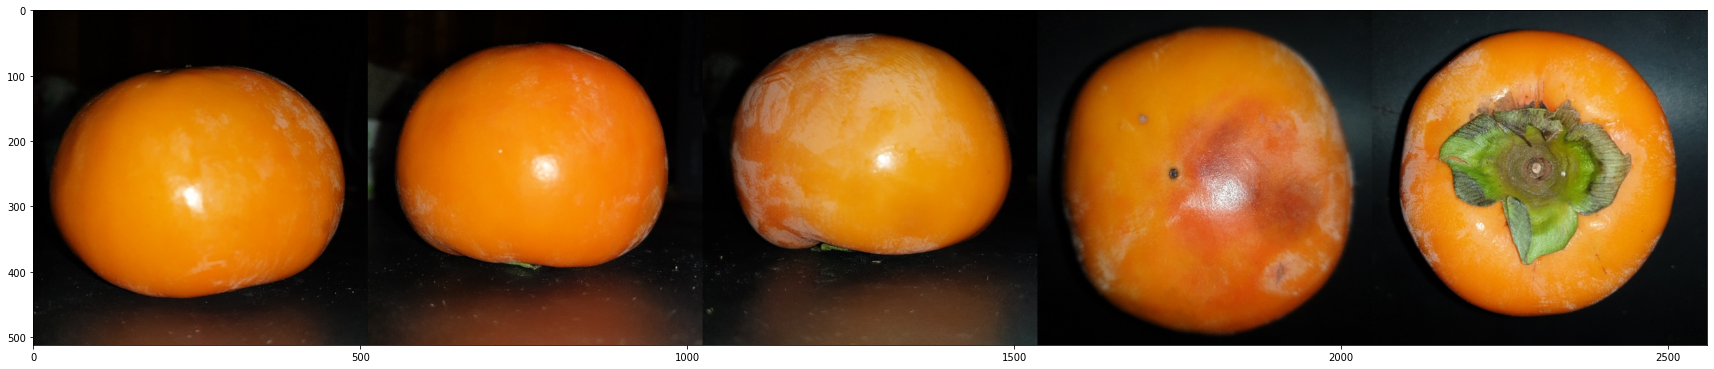

In [ ]:
ShowPersimmon('/content/Classification_Persimmon_2', 'persimmon.29')

In [ ]:
persimmonDF = pd.DataFrame(result,columns= ['name', 'Anthrax', 'LiftedStem', 'StinkBug', 'Wounds', 'BlackSpot1', 'BlackSpot2', 'BlackSpot3', 'ScaleInsects'])
persimmonDF.set_index('name', inplace=True)
persimmonDF

,Anthrax,LiftedStem,StinkBug,Wounds,BlackSpot1,BlackSpot2,BlackSpot3,ScaleInsects
name,,,,,,,,
persimmon.0,0,0,0,0,0,0,0,14618
persimmon.1,0,0,0,0,1456,0,0,15181
persimmon.2,0,0,0,0,1980,400,0,732
persimmon.3,6740,0,0,0,1395,1710,0,440
persimmon.4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
persimmon.225,0,0,13593,2346,0,0,0,0
persimmon.226,0,0,6270,0,1127,1088,0,0
persimmon.227,0,0,5232,0,0,0,8772,0


In [ ]:
persimmonDF.to_excel('persimmonDF_2.xlsx')

In [ ]:
import shutil

shutil.move('/content/persimmonDF_2.xlsx', '/content/drive/MyDrive/01_이미지데이터')

'/content/drive/MyDrive/01_이미지데이터/persimmonDF_2.xlsx'

# Pycaret

In [ ]:
!pip install pycaret

     |████████████████████████████████| 301 kB 24.5 MB/s 
     |████████████████████████████████| 167 kB 58.4 MB/s 
     |████████████████████████████████| 1.7 MB 46.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 7.0 MB/s 
     |████████████████████████████████| 114 kB 73.3 MB/s 
     |████████████████████████████████| 2.0 MB 49.9 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 6.8 MB 51.2 MB/s 
     |████████████████████████████████| 1.3 MB 55.2 MB/s 
     |████████████████████████████████| 261 kB 66.4 MB/s 
     |████████████████████████████████| 15.6 MB 41.9 MB/s 
     |████████████████████████████████| 10.9 MB 62.5 MB/s 
     |████████████████████████████████| 102 kB 15.2 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |█████████████████

In [5]:
import pandas as pd
import numpy as np

persimmonDF = pd.read_excel('/content/drive/MyDrive/01_이미지데이터/persimmonDF_2.xlsx')
persimmonDF.set_index('name', inplace=True)

FileNotFoundError: ignored

In [ ]:
oldPersimmonDF = pd.read_excel('/content/drive/MyDrive/persimmonDF.xlsx')
oldPersimmonDF.set_index('name', inplace=True)
oldPersimmonDF

In [ ]:
persimmonDF['Grade'] = oldPersimmonDF['등급']

In [ ]:
persimmonDF

,Anthrax,LiftedStem,StinkBug,Wounds,BlackSpot1,BlackSpot2,BlackSpot3,ScaleInsects,Grade
name,,,,,,,,,
persimmon.0,0,0,0,0,0,0,0,14618,0
persimmon.1,0,0,0,0,1456,0,0,15181,0
persimmon.2,0,0,0,0,1980,400,0,732,0
persimmon.3,6740,0,0,0,1395,1710,0,440,2
persimmon.4,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...
persimmon.225,0,0,13593,2346,0,0,0,0,1
persimmon.226,0,0,6270,0,1127,1088,0,0,1
persimmon.227,0,0,5232,0,0,0,8772,0,1


In [ ]:
#persimmonDF.rename(columns={'등급':'Grade'}, inplace=True)

In [ ]:
from pycaret.classification import *

clf = setup(data = persimmonDF, target = 'Grade') 
best_5 = compare_models(sort = 'Accuracy', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6250,0.0,0.4169,0.5726,0.5893,0.2895,0.3078,0.124
rf,Random Forest Classifier,0.6062,0.0,0.4179,0.5817,0.5732,0.2894,0.3135,0.476
gbc,Gradient Boosting Classifier,0.6062,0.0,0.3629,0.5198,0.5520,0.2503,0.2639,0.595
et,Extra Trees Classifier,0.6062,0.0,0.3961,0.5521,0.5692,0.2675,0.2696,0.580
dt,Decision Tree Classifier,0.6000,0.0,0.3776,0.5598,0.5672,0.2870,0.2997,0.023
lda,Linear Discriminant Analysis,0.5938,0.0,0.3286,0.4194,0.4792,0.0735,0.1205,0.029
lightgbm,Light Gradient Boosting Machine,0.5938,0.0,0.3660,0.5570,0.5506,0.2258,0.2621,0.192
dummy,Dummy Classifier,0.5938,0.0,0.2750,0.3535,0.4429,0.0000,0.0000,0.025
ridge,Ridge Classifier,0.5750,0.0,0.2900,0.3765,0.4489,0.0022,0.0192,0.023
ada,Ada Boost Classifier,0.5750,0.0,0.3042,0.4414,0.4899,0.0750,0.0781,0.108


In [ ]:
#persimmonDF[persimmonDF['Grade'] == '보류']
persimmonDF.drop(persimmonDF[persimmonDF['Grade'] == '보류'].index, inplace = True)

In [ ]:
persimmonDF.drop(persimmonDF[persimmonDF['Grade'] == '다시'].index, inplace = True)

In [ ]:
clf = setup(data = persimmonDF, target = 'Grade') 
best_5 = compare_models(sort = 'Accuracy', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7212,0.7616,0.5456,0.7042,0.6916,0.3278,0.3670,0.473
rf,Random Forest Classifier,0.7146,0.7518,0.4791,0.6738,0.6794,0.2946,0.3239,0.493
ada,Ada Boost Classifier,0.7029,0.6033,0.4949,0.6484,0.6688,0.2534,0.2677,0.111
ridge,Ridge Classifier,0.7021,0.0000,0.4051,0.5147,0.5913,0.0719,0.0849,0.017
dummy,Dummy Classifier,0.6954,0.5000,0.3333,0.4846,0.5709,0.0000,0.0000,0.017
dt,Decision Tree Classifier,0.6946,0.6262,0.5209,0.6883,0.6795,0.3088,0.3297,0.021
lda,Linear Discriminant Analysis,0.6888,0.5760,0.3990,0.5090,0.5810,0.0539,0.0677,0.022
lightgbm,Light Gradient Boosting Machine,0.6888,0.7278,0.4419,0.6610,0.6578,0.2441,0.2633,0.047
gbc,Gradient Boosting Classifier,0.6750,0.7029,0.5048,0.6635,0.6586,0.2593,0.2773,0.242
knn,K Neighbors Classifier,0.6746,0.6203,0.4445,0.6340,0.6452,0.2254,0.2421,0.121


In [ ]:
 perList = persimmonDF[oldPersimmonDF['SoftPersimmon'] > 0].index

In [ ]:
perList = list(perList)
print(perList)

['persimmon.3', 'persimmon.4', 'persimmon.5', 'persimmon.7', 'persimmon.8', 'persimmon.9', 'persimmon.10', 'persimmon.11', 'persimmon.12', 'persimmon.13', 'persimmon.14', 'persimmon.15', 'persimmon.16', 'persimmon.18', 'persimmon.19', 'persimmon.20', 'persimmon.24', 'persimmon.25', 'persimmon.27', 'persimmon.28', 'persimmon.29', 'persimmon.30', 'persimmon.31', 'persimmon.32', 'persimmon.33', 'persimmon.34', 'persimmon.36', 'persimmon.37', 'persimmon.38', 'persimmon.39', 'persimmon.40', 'persimmon.41', 'persimmon.42', 'persimmon.43', 'persimmon.44', 'persimmon.48', 'persimmon.49', 'persimmon.58', 'persimmon.62', 'persimmon.67', 'persimmon.71', 'persimmon.72', 'persimmon.77', 'persimmon.82', 'persimmon.99', 'persimmon.100', 'persimmon.108', 'persimmon.110', 'persimmon.111', 'persimmon.126', 'persimmon.127', 'persimmon.128', 'persimmon.133', 'persimmon.137', 'persimmon.138', 'persimmon.139', 'persimmon.140', 'persimmon.141', 'persimmon.142', 'persimmon.143', 'persimmon.144', 'persimmon.14

In [ ]:
persimmonDF.drop(perList, inplace = True)

In [ ]:
clf = setup(data = persimmonDF, target = 'Grade') 
best_5 = compare_models(sort = 'Accuracy', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7083,0.8330,0.7250,0.7155,0.6988,0.5213,0.5373,0.471
gbc,Gradient Boosting Classifier,0.6847,0.8365,0.7194,0.6954,0.6628,0.4938,0.5237,0.198
lr,Logistic Regression,0.6139,0.7794,0.5500,0.6463,0.5913,0.3678,0.3995,0.149
dt,Decision Tree Classifier,0.6139,0.6933,0.6750,0.6715,0.5998,0.4038,0.4362,0.019
lda,Linear Discriminant Analysis,0.6014,0.7355,0.4806,0.6225,0.5455,0.3235,0.3971,0.020
nb,Naive Bayes,0.6000,0.7581,0.6750,0.7488,0.6028,0.4350,0.4885,0.019
knn,K Neighbors Classifier,0.5903,0.7663,0.6556,0.6227,0.5792,0.3951,0.4375,0.117
ada,Ada Boost Classifier,0.5847,0.7233,0.6472,0.6148,0.5585,0.3356,0.3580,0.104
ridge,Ridge Classifier,0.5764,0.0000,0.4806,0.5800,0.5461,0.2870,0.3156,0.017
et,Extra Trees Classifier,0.5681,0.8108,0.5444,0.5687,0.5494,0.3000,0.3186,0.454


In [ ]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.9101,0.7222,0.7593,0.6646,0.5091,0.5385
1,0.8889,1.0000,0.8889,0.9111,0.8840,0.8235,0.8407
2,0.8889,0.9286,0.8889,0.9259,0.8889,0.8302,0.8462
3,0.6250,0.6792,0.6667,0.7292,0.6018,0.4419,0.4756
4,0.7500,0.8848,0.8056,0.8125,0.7583,0.6000,0.6156
5,0.6250,0.8196,0.7222,0.7917,0.6458,0.4545,0.5006
6,0.6250,0.7973,0.6944,0.7375,0.6042,0.3846,0.4173
7,0.7500,0.8875,0.8056,0.7500,0.7500,0.5789,0.5789
8,0.5000,0.7415,0.6389,0.5417,0.4792,0.2727,0.3004
9,0.6250,0.8071,0.6944,0.7292,0.6411,0.4419,0.4756


In [ ]:
tuned_ada = tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.8471,0.7222,0.7593,0.6646,0.5091,0.5385
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8889,0.9656,0.8889,0.9259,0.8889,0.8302,0.8462
3,0.8750,0.8792,0.8889,0.9167,0.8750,0.8140,0.8333
4,0.7500,0.8598,0.8056,0.8125,0.7583,0.6000,0.6156
5,0.7500,0.8509,0.8056,0.9167,0.7911,0.6279,0.6758
6,0.5000,0.7973,0.5833,0.3125,0.3833,0.1579,0.1987
7,0.7500,0.8875,0.7778,0.8333,0.7125,0.5556,0.6363
8,0.6250,0.7415,0.7222,0.7500,0.6482,0.4419,0.4756
9,0.5000,0.8571,0.6111,0.6667,0.5208,0.2727,0.3004


In [ ]:
bagged_ada = ensemble_model(ada, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.9101,0.8889,0.9259,0.8889,0.8302,0.8462
1,0.8889,0.9556,0.8889,0.9111,0.8840,0.8235,0.8407
2,0.8889,0.9286,0.8889,0.9259,0.8889,0.8302,0.8462
3,0.6250,0.5292,0.6667,0.7292,0.6018,0.4419,0.4756
4,0.7500,0.8848,0.8056,0.8125,0.7583,0.6000,0.6156
5,0.6250,0.8509,0.7222,0.7917,0.6458,0.4545,0.5006
6,0.6250,0.6629,0.6944,0.7375,0.6042,0.3846,0.4173
7,0.7500,0.8875,0.8056,0.7500,0.7500,0.5789,0.5789
8,0.5000,0.7415,0.6389,0.5417,0.4792,0.2727,0.3004
9,0.5000,0.8571,0.6111,0.6667,0.5208,0.2727,0.3004


In [ ]:
ada = create_model('ada')
gbc = create_model('gbc')
stacker = stack_models(estimator_list = [ada, gbc], meta_model = ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5556,0.7656,0.6111,0.5556,0.5429,0.3333,0.3397
1,0.6667,1.0000,0.7500,0.8333,0.6222,0.5091,0.6139
2,0.5556,0.7656,0.5000,0.5873,0.4963,0.3077,0.4193
3,0.6250,0.5292,0.6667,0.7292,0.6018,0.4419,0.4756
4,0.6250,0.7161,0.7222,0.6458,0.6190,0.4146,0.4255
5,0.5000,0.6759,0.5833,0.3417,0.3958,0.2195,0.2666
6,0.5000,0.7973,0.5833,0.3125,0.3833,0.1579,0.1987
7,0.6250,0.9438,0.6667,0.4107,0.4886,0.3143,0.4769
8,0.5000,0.6290,0.3889,0.4375,0.4643,0.1111,0.1147
9,0.5000,0.8509,0.5833,0.4167,0.4375,0.2381,0.2632


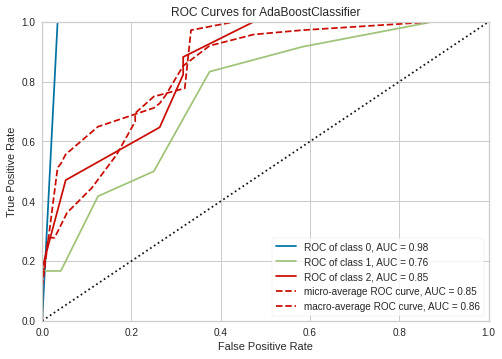

In [ ]:
plot_model(ada)

In [ ]:
save_model(ada, 'ada_saved')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Grade',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('dummy', Dummify(target='Grade')),
                 ('fix_perfect', Remove_100(target='Grade')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs

In [ ]:
ada_saved = load_model('ada_saved')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
blended = blend_models(estimator_list = best_5, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6774,0.6915,0.3968,0.5896,0.6184,0.1530,0.1773
1,0.7667,0.6682,0.4286,0.7583,0.7037,0.2953,0.4127
2,0.7667,0.7614,0.4286,0.7583,0.7037,0.2953,0.4127
3,0.7000,0.6960,0.3968,0.6282,0.6508,0.1718,0.1927
4,0.6667,0.6813,0.4262,0.5889,0.6228,0.2063,0.2186
Mean,0.7155,0.6997,0.4154,0.6647,0.6599,0.2243,0.2828
SD,0.0432,0.0323,0.0152,0.0778,0.0375,0.0604,0.1069


In [ ]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.5152,0,0.3333,0.4735,0.4916,-0.0492,-0.051


In [ ]:
!pip install joblib

In [ ]:
import pickle
import joblib
clf_from_joblib = joblib.load('ada_saved.pkl') 

In [ ]:
resault = ada_saved.predict(npersimmonDF)
print(resault)

[0 0 0 0 0 0 0 0 0 0 1 0 1 2 2 2 2 2 0 2 0 0 0 2 1 0 1 0 0 2 1 0 2 0 0 0 2
 2 2 1 1 1 2 1 0 2 1 1 2 0 2 2 2 2 1 0 2 2 1 1 1 1 0 1 0 1 1 1 1 2 2 2 2 2
 2 2 1 0 2 1 1 1 2 1 2 1 2 1 2 2 1 2 2 1 2 0 1 2 2 0 1 2 1 0 2 2 1 2 1 1 0
 2 1 0 2 1 1 2 1]


In [ ]:
npersimmonDF = persimmonDF.drop(['Grade'], axis=1)
a = npersimmonDF.values.tolist()
a

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [3128, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [4347, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 3008, 0, 0, 0, 0],
 [0, 0, 0, 1558, 0, 0, 0, 0],
 [0, 0, 0, 4022, 0, 0, 0, 0],
 [0, 0, 0, 1696, 0, 0, 0, 0],
 [0, 0, 0, 4465, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 38306, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 672, 0, 0, 0, 0],
 [0, 0, 2400, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [10976, 0, 0, 504, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [15570, 0, 0, 0, 0, 0, 0, 0],
 [3420, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 10344, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 

In [ ]:
persimmonDF

,Anthrax,LiftedStem,StinkBug,Wounds,BlackSpot1,BlackSpot2,BlackSpot3,ScaleInsects,Grade
name,,,,,,,,,
persimmon.0,0,0,0,0,0,0,0,0,0
persimmon.1,0,0,0,0,0,0,0,0,0
persimmon.2,0,0,0,0,0,0,0,0,0
persimmon.6,0,0,0,0,0,0,0,0,0
persimmon.17,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
persimmon.225,0,0,10372,2346,0,0,0,0,1
persimmon.226,0,0,4781,0,0,0,0,0,1
persimmon.227,0,0,5232,0,0,0,0,0,1
